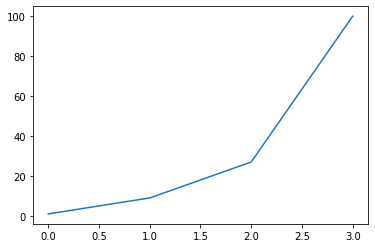

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

data = [1,9,27,100]
plt.figure()
plt.plot(data)


In [2]:
from arcgis.gis import GIS


# Create instance
gis = GIS()
br_map = gis.map("Wall Street, New York", 4)

br_map

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
# Import the geocoding tool and geopy
from geopandas.tools import geocode

lst = [127,352,345]
lst2 = ["Tijuca, Rio de Janeiro, Brazil",
        "Kaivokatu 8, 00101 Helsinki, Finland",
        "Hermannin rantatie 1, 00580 Helsinki, Finland"]

data = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['id', 'addr']) 


print(data)

# Geocode addresses with Nominatim backend
geo = geocode(data['addr'], provider='nominatim', user_agent='csc_user_ht')
print('\n\n geo head | points \n')
print(geo.head())

    id                                           addr
0  127                 Tijuca, Rio de Janeiro, Brazil
1  352           Kaivokatu 8, 00101 Helsinki, Finland
2  345  Hermannin rantatie 1, 00580 Helsinki, Finland


 geo head | points 

                          geometry  \
0  POINT (-43.2381453 -22.9332164)   
1    POINT (24.9416849 60.1699637)   
2    POINT (24.9740738 60.1956039)   

                                             address  
0  Tijuca, Zona Norte do Rio de Janeiro, Rio de J...  
1  Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...  
2  Hermannin rantatie, Kyläsaari, Hermanni, Helsi...  


In [13]:
import geopandas as gpd
from shapely.geometry import Polygon

lat_point_list = [-13.2381453, -13.072651, -10.853033, -10.854457]
lon_point_list = [-45.9332164, -38.407759, -38.435935, -45.349553]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

import folium
m = folium.Map([-13.854457, -38.377184], zoom_start=4, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m

0    POLYGON ((-45.9332164 -13.2381453, -38.407759 ...
Name: geometry, dtype: object
